In [1]:
import DataProvider
prov = DataProvider.DataProvider()

reading helper data on path: ./Data/Helper/backGround_street.wav
reading helper data on path: ./Data/Helper/backGround_noice.wav
reading helper data on path: ./Data/Helper/backGround_nature.wav
[new value of  9
new value of  12
-new value of  13
new value of  16
--new value of  36
new value of  45
----new value of  49
new value of  61
-------new value of  65
new value of  81
-------------------------------------------------------------------------------------------new value of  95
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------new value of  101
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
X = list()
y = list()
trainVal = list()

In [3]:
while prov.hasNext(True):
    Xt, yt = prov.next(True)
    for i in range(len(yt)):
        if yt[i] == 1:
            trainVal.append(i+1)
            
    X.append(Xt)
    y.append(yt)

In [4]:
X = np.nan_to_num(np.array(X))
y = np.matrix(y)

X.shape, y.shape

((4128, 101, 30), (4128, 5))

In [5]:
X_train = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
X_train.shape

(4128, 101, 30, 1)

In [6]:
X2 = list()
y2 = list()
actualVal = list()

In [7]:
while prov.hasNext(False):
    X2t, y2t = prov.next(False)
    actualVal.append(y2t)
    
    k = np.zeros(5)
    k[y2t - 1] = 1
    
    X2.append(X2t)
    y2.append(k)

In [8]:
X2 = np.nan_to_num(np.array(X2))
y2 = np.matrix(y2)

X2.shape, y2.shape

((27, 101, 30), (27, 5))

In [9]:
X_test = X2.reshape(X2.shape[0], X2.shape[1], X2.shape[2], 1)
X_test.shape

(27, 101, 30, 1)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,InputLayer,AveragePooling2D, BatchNormalization

from keras import optimizers

Using TensorFlow backend.


In [91]:
model = Sequential()

In [92]:
model.add(InputLayer(input_shape = (X.shape[1], X.shape[2],1)))
#model.add(BatchNormalization())

model.add(Conv2D(32, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 97, 26, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 48, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 10, 64)        32832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 5, 64)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 22, 5, 64)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 3, 128)       

In [94]:
# model.add(Dense(units=256, activation='relu', input_dim = prov.returnSizeOfEverySpectogram()))
# #model.add(Dropout(0.1))
# model.add(Dense(64, activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(Dense(32, activation='relu'))
# #model.add(Dense(256, activation='relu'))
# model.add(Dense(units=5, activation='softmax'))

In [95]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

In [349]:
history = model.fit(X_train, y, epochs=1, batch_size=32, verbose=1, validation_split=0.2)

Train on 3302 samples, validate on 826 samples
Epoch 1/1
3302/3302 [==============================] - 13s 4ms/step - loss: 0.0145 - accuracy: 0.9540 - val_loss: 0.0446 - val_accuracy: 0.8584


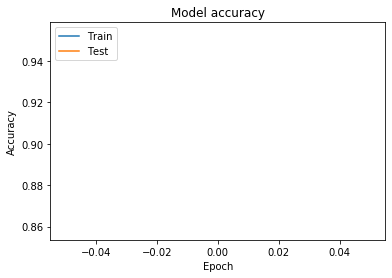

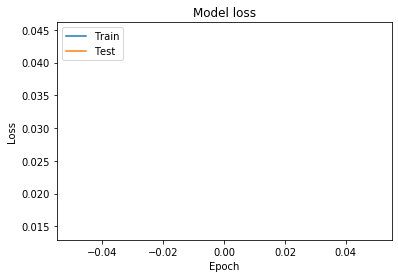

In [350]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [351]:
loss_and_metrics = model.evaluate(X_test, y2, batch_size=128)

27/27 [==============================] - 0s 700us/step


In [352]:
pred = model.predict(X_test, batch_size=128)

In [353]:
pr = np.argmax(pred, axis=1)+1
pr , np.array(actualVal)

(array([1, 5, 2, 2, 4, 3, 4, 4, 3, 5, 4, 2, 4, 1, 5, 4, 4, 4, 2, 4, 2, 5,
        5, 1, 1, 3, 5]),
 array([1, 5, 2, 3, 4, 3, 4, 1, 3, 5, 2, 2, 5, 1, 5, 4, 4, 4, 2, 1, 2, 5,
        3, 1, 5, 3, 5]))

In [354]:
correct = [1 if a == b else 0 for (a, b) in zip(pr, actualVal)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ("Accuracy: " + str(accuracy * 100) + "%")

Accuracy: 74.07407407407408%


In [355]:
for i in pred:
    count = sum(i)
    for j in range(len(i)):
        i[j] = i[j] / count

In [356]:
import copy
countGrade = copy.deepcopy(actualVal)


In [357]:
for i in range(len(countGrade)):
    ans = actualVal[i]
    countGrade[i] = pred[i][ans-1]

In [358]:
result = sum(countGrade) / len(countGrade)
result

0.7349987427130684

In [ ]:
save_the_model = False

In [288]:
if save_the_model:
    # serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

Saved model to disk
